<center><br><font size=6>Data Tapas</font><br>
    <br><font size=4>Practical Test </font><br>
    <br> 2020<br>
    <br>By: <b>Michael Levigner</b><br></center>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc">Imports</div>
<div id="toc">EDA</div>
<div id="toc">Preprocessing</div>
<div id="toc">Model Training & Evaluation</div>
<div id="toc">Resampling Data</div>
<div id="toc">Model Training & Evaluation - again</div>

# Imports

In [218]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import sklearn as sk
from sklearn.preprocessing import scale
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
import png
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix
import scipy.stats as stats
warnings.filterwarnings('ignore')
from sklearn import datasets
%matplotlib inline

EDA

In [219]:
df= pd.read_csv("C:/Users/Michael Levinger/Desktop/loan-DS-Test.csv")

In [220]:
df.head(5)

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,1/1/1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,9/12/1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [221]:
df.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [222]:
df.dtypes

UniqueID                                 int64
disbursed_amount                         int64
asset_cost                               int64
ltv                                    float64
branch_id                                int64
supplier_id                              int64
manufacturer_id                          int64
Current_pincode_ID                       int64
Date.of.Birth                           object
Employment.Type                         object
DisbursalDate                           object
State_ID                                 int64
Employee_code_ID                         int64
MobileNo_Avl_Flag                        int64
Aadhar_flag                              int64
PAN_flag                                 int64
VoterID_flag                             int64
Driving_flag                             int64
Passport_flag                            int64
PERFORM_CNS.SCORE                        int64
PERFORM_CNS.SCORE.DESCRIPTION           object
PRI.NO.OF.ACC

In [223]:
df.describe().round()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,90983.0,90983.0,90983.0,90983.0,90983.0,90983.0,90983.0,90983.0,90983.0,90983.0,...,90983.0,90983.0,90983.0,90983.0,90983.0,90983.0,90983.0,90983.0,90983.0,90983.0
mean,535059.0,54128.0,76018.0,74.0,57.0,19094.0,70.0,3644.0,7.0,893.0,...,0.0,5840.0,7338.0,7233.0,10175.0,248.0,0.0,0.0,0.0,0.0
std,68565.0,12566.0,17766.0,12.0,58.0,3323.0,22.0,2189.0,4.0,558.0,...,0.0,219033.0,210285.0,209750.0,133768.0,8868.0,1.0,0.0,1.0,0.0
min,417428.0,13369.0,37658.0,10.0,1.0,10524.0,45.0,1.0,1.0,3.0,...,0.0,-239782.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,474908.0,47145.0,66242.0,68.0,10.0,16159.0,45.0,1720.0,3.0,394.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,534863.0,53734.0,71418.0,76.0,36.0,18342.0,86.0,3012.0,5.0,838.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,595108.0,60213.0,79500.0,83.0,74.0,22639.0,86.0,5792.0,9.0,1364.0,...,0.0,0.0,0.0,0.0,1843.0,0.0,0.0,0.0,0.0,0.0
max,658675.0,987354.0,1328954.0,95.0,251.0,24787.0,156.0,7270.0,18.0,3466.0,...,8.0,36032852.0,30000000.0,30000000.0,20766553.0,1231166.0,35.0,12.0,23.0,1.0


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90983 entries, 0 to 90982
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   UniqueID                             90983 non-null  int64  
 1   disbursed_amount                     90983 non-null  int64  
 2   asset_cost                           90983 non-null  int64  
 3   ltv                                  90983 non-null  float64
 4   branch_id                            90983 non-null  int64  
 5   supplier_id                          90983 non-null  int64  
 6   manufacturer_id                      90983 non-null  int64  
 7   Current_pincode_ID                   90983 non-null  int64  
 8   Date.of.Birth                        90983 non-null  object 
 9   Employment.Type                      87476 non-null  object 
 10  DisbursalDate                        90983 non-null  object 
 11  State_ID                    

Heatmap Correlation

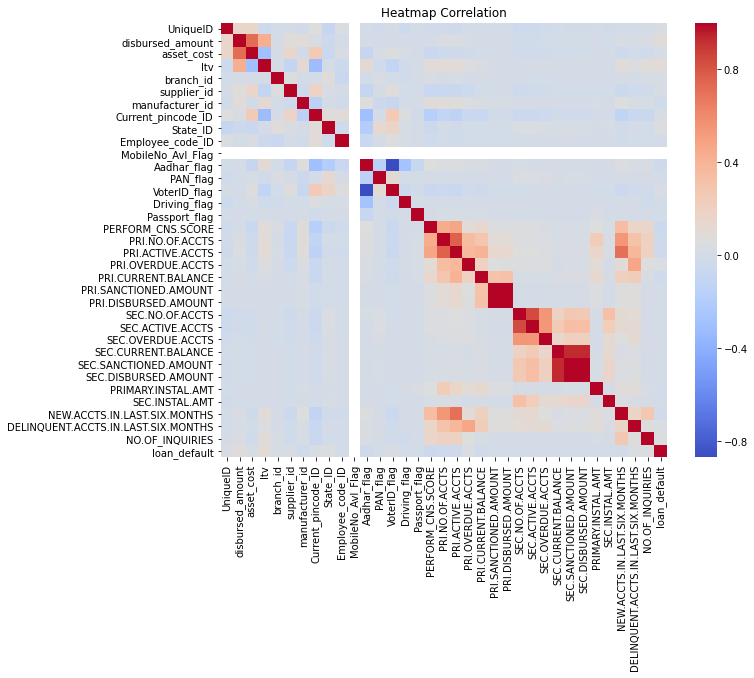

In [225]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
ax = sns.heatmap(corr, cmap="coolwarm")
ax.set_title("Heatmap Correlation",fontsize=12)
plt.show()

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

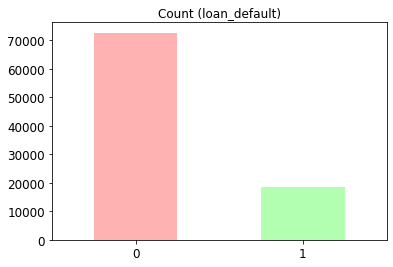

In [226]:
colors = ['red', 'lime']
df.loan_default.value_counts().plot(kind='bar', title='Count (loan_default)',alpha=0.3,color=colors , fontsize=12);
plt.xticks(rotation=0)

As we can see - our data is imbalanced

Lets plot the numeric columns

In [227]:
df1 = df.copy()

In [228]:
df1 = df1.drop(columns=['PERFORM_CNS.SCORE.DESCRIPTION', 'Employment.Type','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH'])

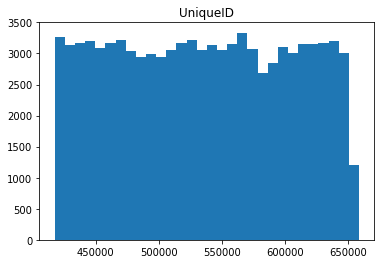

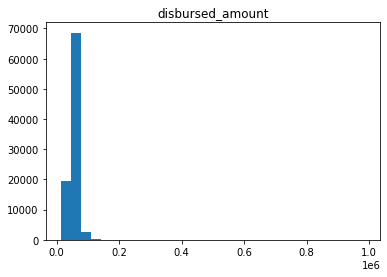

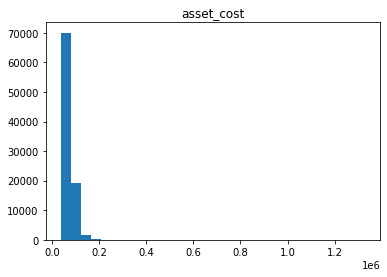

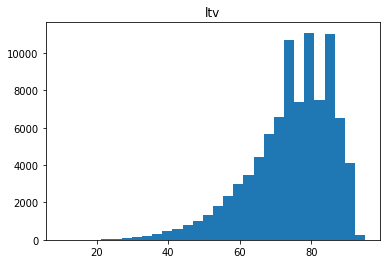

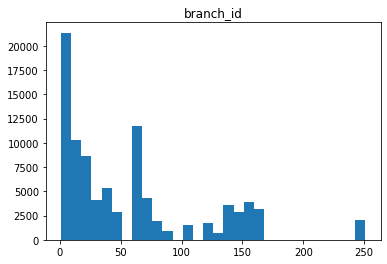

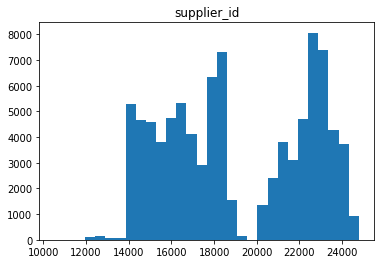

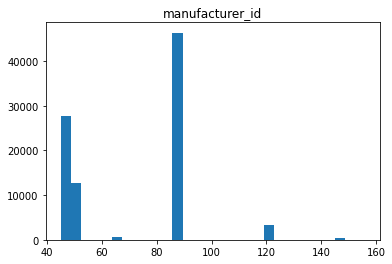

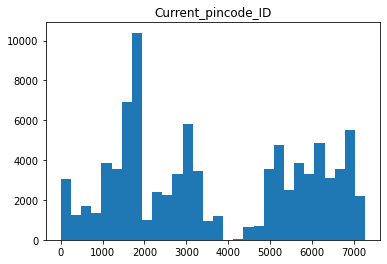

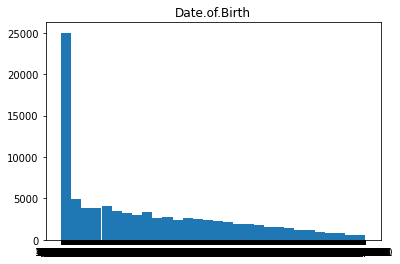

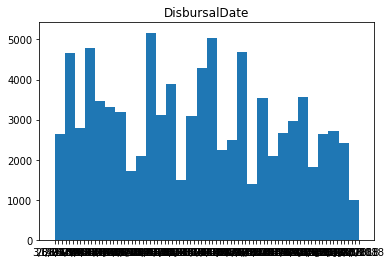

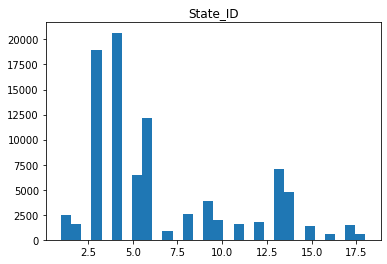

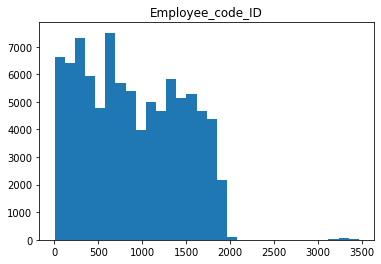

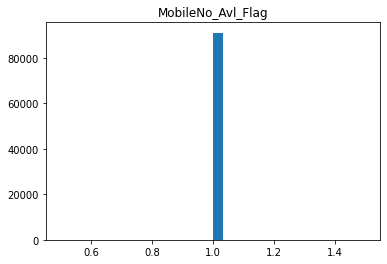

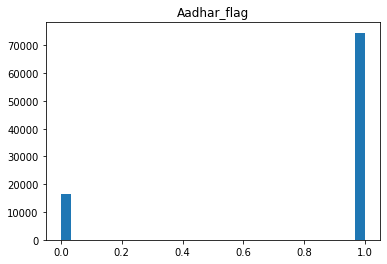

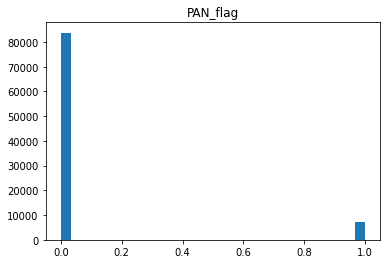

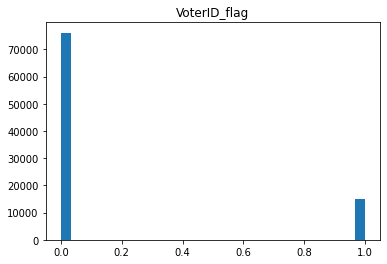

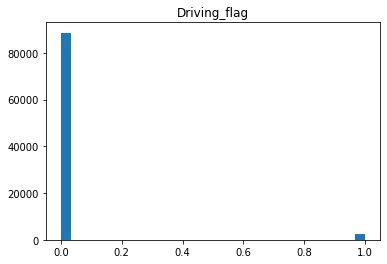

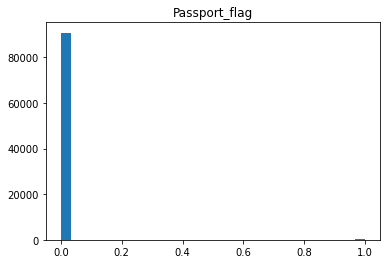

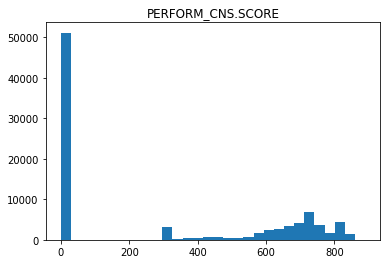

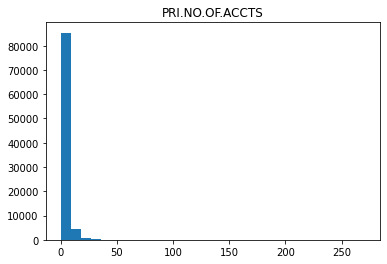

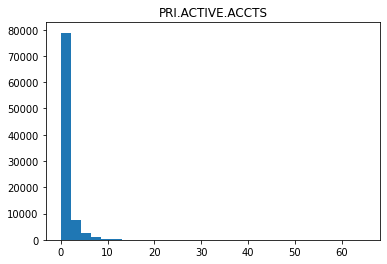

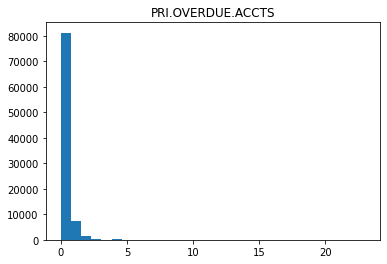

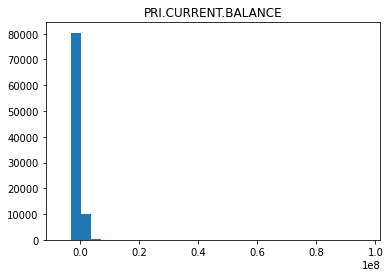

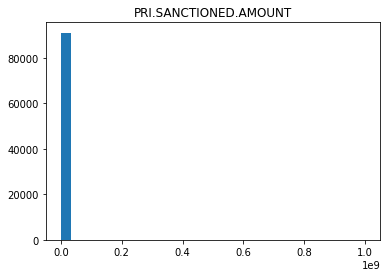

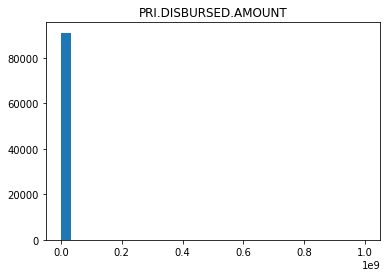

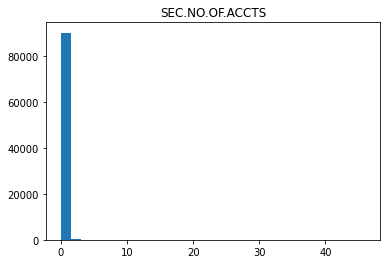

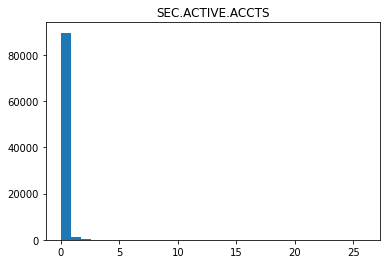

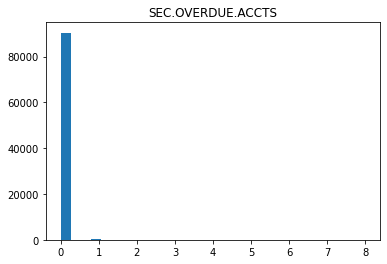

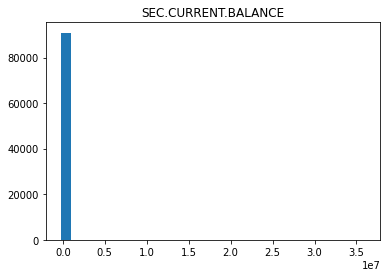

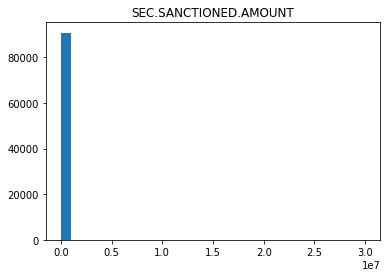

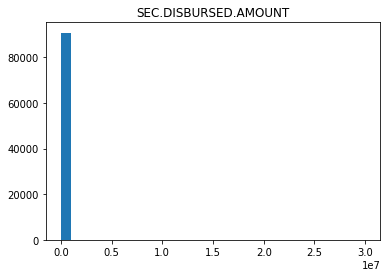

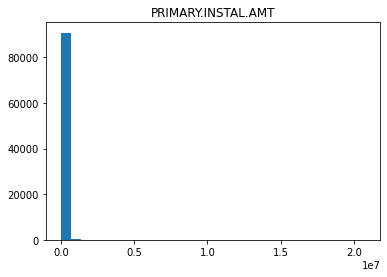

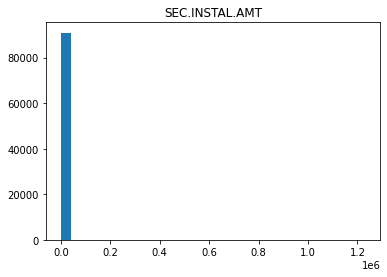

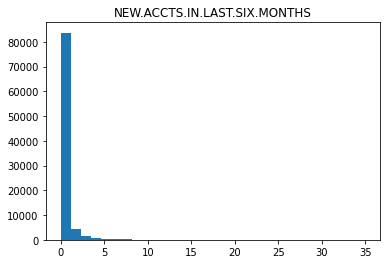

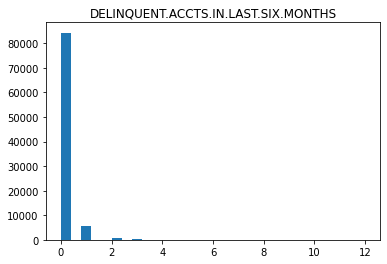

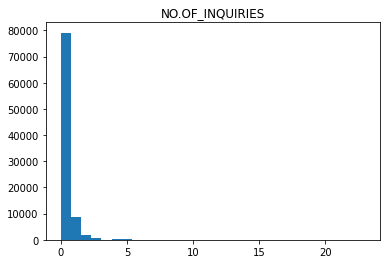

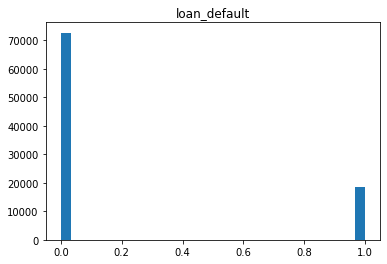

In [229]:
for col in df1.columns.tolist():
    plt.hist(df1[col],bins=30)
    plt.title(col)
    plt.show()

Lets plot the categorial columns

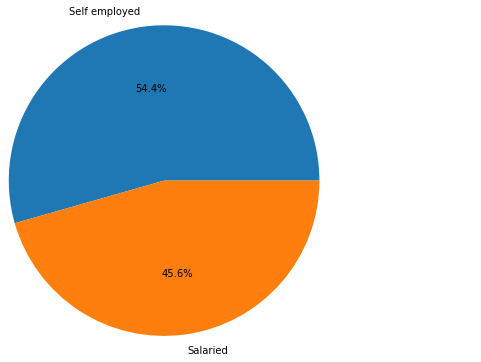

In [230]:
labels = df['Employment.Type'].value_counts().index.tolist()
counts = df['Employment.Type'].value_counts().values.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%')
ax1.axis([0, 2, -1, 0.4])
plt.show()

Our data is slightly imbalanced toward Self employed

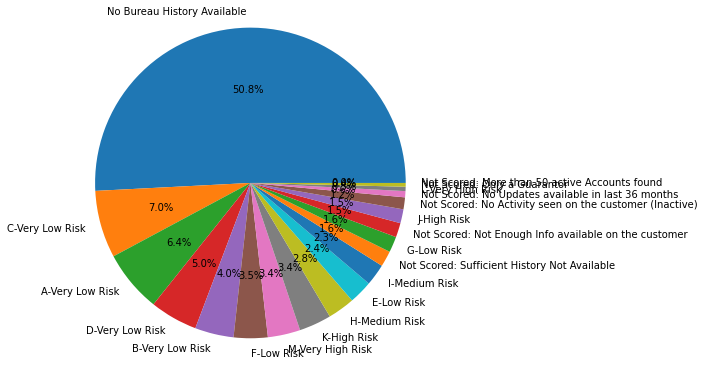

In [231]:
labels = df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts().index.tolist()
counts = df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts().values.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%')
ax1.axis([0, 2, -1, 0.4])
plt.show()

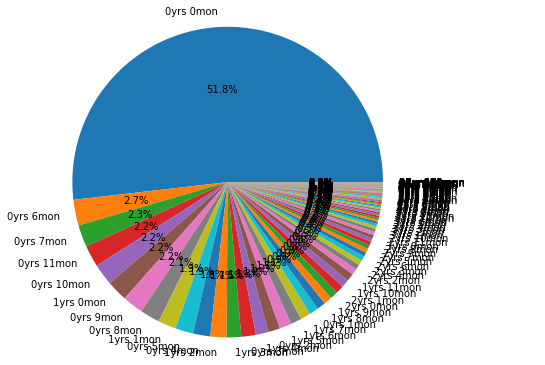

In [232]:
labels = df['AVERAGE.ACCT.AGE'].value_counts().index.tolist()
counts = df['AVERAGE.ACCT.AGE'].value_counts().values.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%')
ax1.axis([0, 2, -1, 0.4])
plt.show()

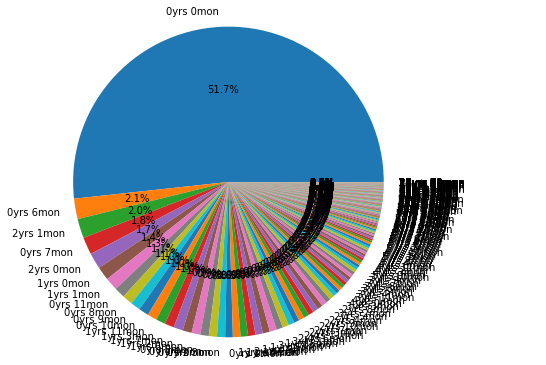

In [233]:
labels = df['CREDIT.HISTORY.LENGTH'].value_counts().index.tolist()
counts = df['CREDIT.HISTORY.LENGTH'].value_counts().values.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(counts, labels=labels, autopct='%1.1f%%')
ax1.axis([0, 2, -1, 0.4])
plt.show()

# Pre-processing

Encode the categorical variable as a one-hot vector, i.e. a vector where only one element is non-zero, or hot.

In [234]:
pd.get_dummies(df['PERFORM_CNS.SCORE.DESCRIPTION'], prefix='PERFORM_CNS.SCORE.DESCRIPTION')

,PERFORM_CNS.SCORE.DESCRIPTION_A-Very Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_B-Very Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_C-Very Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_D-Very Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_E-Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_F-Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_G-Low Risk,PERFORM_CNS.SCORE.DESCRIPTION_H-Medium Risk,PERFORM_CNS.SCORE.DESCRIPTION_I-Medium Risk,PERFORM_CNS.SCORE.DESCRIPTION_J-High Risk,PERFORM_CNS.SCORE.DESCRIPTION_K-High Risk,PERFORM_CNS.SCORE.DESCRIPTION_L-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Sufficient History Not Available
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90978,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
90979,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
90980,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
90981,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [235]:
# use pd.concat to join the new columns with your original dataframe
df = pd.concat([df,pd.get_dummies(df['PERFORM_CNS.SCORE.DESCRIPTION'], prefix='PERFORM_CNS.SCORE.DESCRIPTION')],axis=1)

# now drop the original column (you don't need it anymore)
df.drop(['PERFORM_CNS.SCORE.DESCRIPTION'],axis=1, inplace=True)

In [236]:
pd.get_dummies(df['Employment.Type'], prefix='PERFORM_CNS.SCORE.DESCRIPTION')

,PERFORM_CNS.SCORE.DESCRIPTION_Salaried,PERFORM_CNS.SCORE.DESCRIPTION_Self employed
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
90978,1,0
90979,0,1
90980,0,1
90981,0,1


In [237]:
# use pd.concat to join the new columns with your original dataframe
df = pd.concat([df,pd.get_dummies(df['Employment.Type'], prefix='Employment.Type')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
df.drop(['Employment.Type'],axis=1, inplace=True)

In [238]:
df.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,DisbursalDate,...,PERFORM_CNS.SCORE.DESCRIPTION_M-Very High Risk,PERFORM_CNS.SCORE.DESCRIPTION_No Bureau History Available,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: More than 50 active Accounts found,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Activity seen on the customer (Inactive),PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: No Updates available in last 36 months,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Not Enough Info available on the customer,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Only a Guarantor,PERFORM_CNS.SCORE.DESCRIPTION_Not Scored: Sufficient History Not Available,Employment.Type_Salaried,Employment.Type_Self employed
0,420825,50578,58400,89.55,67,22807,45,1441,1/1/1984,3/8/2018,...,0,1,0,0,0,0,0,0,1,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,26-09-18,...,0,0,0,0,0,0,0,0,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,1/8/2018,...,0,1,0,0,0,0,0,0,0,1
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,26-10-18,...,0,0,0,0,0,0,0,0,0,1
4,539055,52378,60300,88.39,67,22807,45,1495,9/12/1977,26-09-18,...,0,1,0,0,0,0,0,0,0,1


Extract int from dtype: object

In [239]:
df['AVERAGE.ACCT.AGE']

0         0yrs 0mon
1        1yrs 11mon
2         0yrs 0mon
3         0yrs 8mon
4         0yrs 0mon
            ...    
90978    0yrs 10mon
90979     2yrs 1mon
90980     2yrs 6mon
90981     0yrs 0mon
90982     2yrs 0mon
Name: AVERAGE.ACCT.AGE, Length: 90983, dtype: object

In [240]:
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].map(lambda x: x.lstrip('-+').rstrip('mon'))  

In [241]:
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].str.replace('yrs', '')

In [242]:
df['AVERAGE.ACCT.AGE'] = df['AVERAGE.ACCT.AGE'].str.replace(' ', '')

In [243]:
df['AVERAGE.ACCT.AGE']

0         00
1        111
2         00
3         08
4         00
        ... 
90978    010
90979     21
90980     26
90981     00
90982     20
Name: AVERAGE.ACCT.AGE, Length: 90983, dtype: object

In [244]:
df['AVERAGE.ACCT.AGE'] =df['AVERAGE.ACCT.AGE'].astype(int)

In [245]:
df['CREDIT.HISTORY.LENGTH']

0         0yrs 0mon
1        1yrs 11mon
2         0yrs 0mon
3         1yrs 3mon
4         0yrs 0mon
            ...    
90978     1yrs 1mon
90979    4yrs 11mon
90980    3yrs 11mon
90981     0yrs 0mon
90982    2yrs 10mon
Name: CREDIT.HISTORY.LENGTH, Length: 90983, dtype: object

In [246]:
df['CREDIT.HISTORY.LENGTH']= df['CREDIT.HISTORY.LENGTH'].map(lambda x: x.lstrip('-+').rstrip('mon'))  

In [247]:
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].str.replace('yrs', '')

In [248]:
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].str.replace(' ', '')

In [249]:
df['CREDIT.HISTORY.LENGTH']

0         00
1        111
2         00
3         13
4         00
        ... 
90978     11
90979    411
90980    311
90981     00
90982    210
Name: CREDIT.HISTORY.LENGTH, Length: 90983, dtype: object

In [250]:
df['CREDIT.HISTORY.LENGTH'] = df['CREDIT.HISTORY.LENGTH'].astype(int)

Change Date type - to int 

In [251]:
df['Date.of.Birth'] = pd.to_datetime(df['Date.of.Birth'], errors='coerce')

In [252]:
df['Date.of.Birth'] = df['Date.of.Birth'].dt.strftime("%d%m%Y").astype(int)

In [253]:
df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'], errors='coerce')

In [254]:
df['DisbursalDate'] = df['DisbursalDate'].dt.strftime("%d%m%Y").astype(int)

In [255]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90983 entries, 0 to 90982
Data columns (total 61 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   UniqueID                                                                               90983 non-null  int64  
 1   disbursed_amount                                                                       90983 non-null  int64  
 2   asset_cost                                                                             90983 non-null  int64  
 3   ltv                                                                                    90983 non-null  float64
 4   branch_id                                                                              90983 non-null  int64  
 5   supplier_id                                                               

Two more things we want to do before modeling:

1)Standatization - Many machine learning algorithms work better when features are on a relatively similar scale and close to normally distributed.

2)Dimensionality reduction using PCA.

In [256]:
X = df.drop(columns = ['loan_default'])

In [257]:
y = df['loan_default']

It is necessary to normalize data before performing PCA. The PCA calculates a new projection of your data set. And the new axis are based on the standard deviation of your variables

In [258]:
X=scale(X)

In [259]:
pca = PCA(n_components = 0.95) 
X_pca = pca.fit_transform(X) 

Split data to train/test

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Model Training & Evaluating

XGboost

In [261]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
recall = recall_score(y_test,y_pred)
print("recall: %.2f%%" % (recall * 100.0))
precision = precision_score(y_test, y_pred)
print("precision: %.2f%%" % (precision * 100.0))

Accuracy: 78.81%
recall: 3.11%
precision: 35.78%


Confusion matrix

Confusion matrix:
 [[14224   210]
 [ 3646   117]]


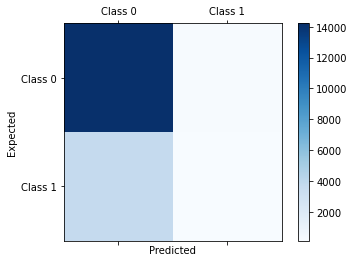

In [262]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

AUC

In [263]:
# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.508


RandomForest

In [264]:
from sklearn.ensemble import RandomForestClassifier
rclf = RandomForestClassifier()
rclf.fit(X_train,y_train)
y_pred = rclf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
recall = recall_score(y_test,y_pred)
print("recall: %.2f%%" % (recall * 100.0))
precision = precision_score(y_test, y_pred)
print("precision: %.2f%%" % (precision * 100.0))

Accuracy: 79.08%
recall: 2.34%
precision: 40.18%


Confusion matrix

Confusion matrix:
 [[14303   131]
 [ 3675    88]]


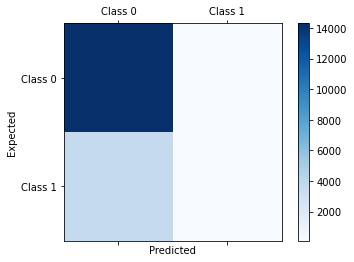

In [265]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

AUC

In [266]:
# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.507


Naïve Bayes Classifier

In [267]:
from sklearn.naive_bayes import GaussianNB
NB_clf = GaussianNB().fit(X_train, y_train)
y_pred = NB_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
recall = recall_score(y_test,y_pred)
print("recall: %.2f%%" % (recall * 100.0))
precision = precision_score(y_test, y_pred)
print("precision: %.2f%%" % (precision * 100.0))

Accuracy: 54.80%
recall: 54.24%
precision: 23.89%


In [268]:
# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.546


Confusion matrix

Confusion matrix:
 [[7931 6503]
 [1722 2041]]


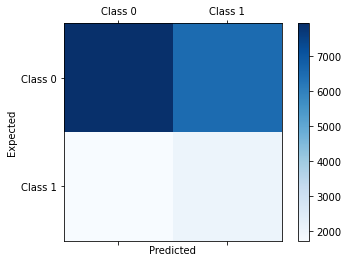

In [269]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

AUC

In [270]:
# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.546


# Resampling

As we saw in the first part, the data is highly imbalanced (more 0's than 1's). To solve this problem we will use a resampling method called under-sampling. Then lets see if the model scores better then before.


In [271]:
# Divide by class
df_class_0 = df[df['loan_default'] == 0]
df_class_1 = df[df['loan_default'] == 1]

In [272]:
# Class count
count_class_0, count_class_1 = df.loan_default.value_counts()

In [273]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

Random under-sampling:
1    18374
0    18374
Name: loan_default, dtype: int64


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

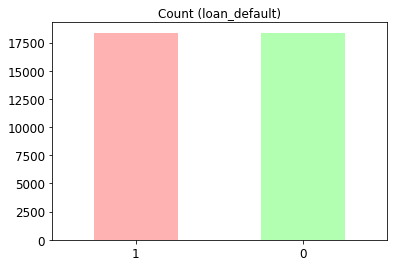

In [274]:
print('Random under-sampling:')
print(df_under.loan_default.value_counts())
colors = ['red', 'lime']
df_under.loan_default.value_counts().plot(kind='bar', title='Count (loan_default)',alpha=0.3,color=colors , fontsize=12);
plt.xticks(rotation=0)

In [275]:
X = df_under.drop(columns = ['loan_default'])

In [276]:
y = df_under['loan_default']

It is necessary to normalize data before performing PCA. The PCA calculates a new projection of your data set. And the new axis are based on the standard deviation of your variables

In [277]:
X=scale(X)

In [278]:
pca = PCA(n_components = 0.95) 
X_pca = pca.fit_transform(X) 

Split data to train/test

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

Run model and Evaluate result after resampling

In [280]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
recall = recall_score(y_test,y_pred)
print("recall: %.2f%%" % (recall * 100.0))
precision = precision_score(y_test, y_pred)
print("precision: %.2f%%" % (precision * 100.0))

Accuracy: 58.33%
recall: 60.91%
precision: 58.06%


Confusion matrix

Confusion matrix:
 [[2042 1622]
 [1441 2245]]


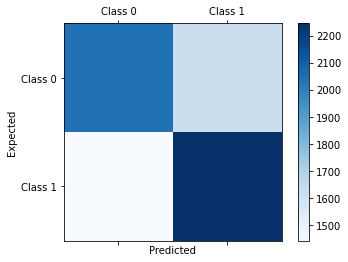

In [281]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

AUC

In [282]:
# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.583


Naïve Bayes Classifier

In [283]:
from sklearn.naive_bayes import GaussianNB
NB_clf = GaussianNB().fit(X_train, y_train)
NB_y_pred = NB_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
recall = recall_score(y_test,y_pred)
print("recall: %.2f%%" % (recall * 100.0))
precision = precision_score(y_test, y_pred)
print("precision: %.2f%%" % (precision * 100.0))

Accuracy: 58.33%
recall: 60.91%
precision: 58.06%


Confusion matrix

Confusion matrix:
 [[2042 1622]
 [1441 2245]]


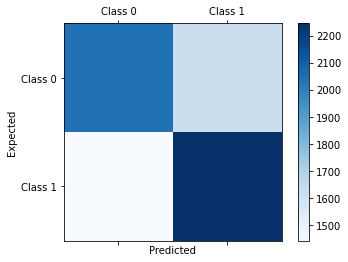

In [284]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

AUC

In [285]:
# calculate AUC
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.583
